In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from copy import deepcopy

from points_Interpolation import Interpolate

[-1.5, 1.5]
[1.1916, 4.3817]


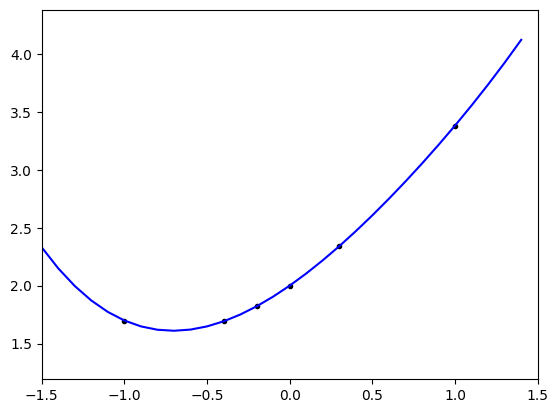

In [16]:
def plot_curve (func, axe: 'plt.Axes', interval_x: list, interval_y: list,
                step: float = 0.1, color_val: str = 'b', label_txt: str = '') -> None:
    
    x_np = np.arange(interval_x[0], interval_x[1], step)

    axe.set(xlim= interval_x, ylim = interval_y)
    
    axe.plot(x_np, func.f(x_np), color=color_val, label=label_txt)

def plot_points (x_coordinates: list, y_coordinates: list, axe: 'plt.Axes',
                 marker:str = '.', color_val: str='black', label_txt: str = ''):
    
    axe.scatter (x_coordinates, y_coordinates, marker=marker,
                 color = color_val, label = label_txt )
    
def intervals (x_coordinates: list, y_coordinates: list) -> list:

    ordered_x_vals = sorted(deepcopy(x_coordinates))
    ordered_y_vals = sorted(deepcopy(y_coordinates))

    


    x_interval = [ordered_x_vals[0] - 0.5, ordered_x_vals[len(ordered_x_vals) - 1] + 0.5]
    y_interval = [ordered_y_vals[0] - 0.5, ordered_y_vals[len(ordered_y_vals) - 1] + 1]

    return [x_interval, y_interval]

    
points_1 = [
    (0, 1),
    (1, 6),
    (2, 5),
    (3, -8),
]

points_2 = [
    (-1, 1.6988),
    (-0.4, 1.6916),
    (-0.2, 1.8214),
    (0, 2),
    (0.3, 2.3408),
    (1, 3.3817),
]

interpolator = Interpolate(points_2)

vandermond_func = interpolator.vandermond_method()
lagrange_func = interpolator.lagrange_method()
newton_func = interpolator.newton_method()

fig, axe = plt.subplots()

interval_x, interval_y = intervals(interpolator.x_values, interpolator.y_values)
print(interval_x)
print(interval_y)

plot_curve(newton_func, axe, interval_x, interval_y)
plot_points(interpolator.x_values, interpolator.y_values, axe)




    

